# Match DMRs to featureCounts matrix

In [1]:
# import DMR dataframes from txt file 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json

# 1 Import data 

In [2]:
# read in DMR data (unique gene ids) 
with open('7_match_dmr_to_gene/dmr_within_geneborders_genelist/dmr_unique_geneids.json', 'r') as f:
    dmr_unique_geneids = json.load(f)
# concaternte all DMRs into one list 
dmr = [item for sublist in dmr_unique_geneids.values() for item in sublist]

In [3]:
# import fetaure cpounts (gene expression data)
expression = pd.read_csv('/home/maggy/WholeGenomeBisulphiteSequencing/RNAseq_pipeline/9_create_GeneCountsMatrix/gene_matrix_count.csv', sep=',', index_col=0)

# 2 Filter expression data to only contain DMR genes
Filter out low counts (below 50 as sum) 

In [4]:
# filter expression df for all the DMR genes
expressiondmr = expression[expression.index.isin(dmr)]
# filter the rows that have as a sum less than 50 counts
expressiondmr = expressiondmr[(expressiondmr.sum(axis=1) >= 50)]
# Specify the desired column order
column_order = ['N1', 'N2', 'N3', 'N7', 'A1', 'A2', 'A4', 'A7', 'R2', 'R3', 'R7', 'R8']
# Reorder the dataframe columns
expressiondmr = expressiondmr.reindex(columns=column_order)

In [5]:
expressiondmr.head(3)

,N1,N2,N3,N7,A1,A2,A4,A7,R2,R3,R7,R8
Geneid,,,,,,,,,,,,
ccar_ub01-g23719,891,986,840,1100,535,616,788,581,1420,1039,669,1126
ccar_ua02-g1919,243,313,239,240,107,64,101,111,217,134,119,167
ccar_ua02-g2350,165,183,140,161,89,107,108,82,209,142,148,150


In [6]:
dmrna=[]
dmrnr=[]
dmrar=[]

# split the expressiondmr df into three df 
expressionNA = expressiondmr[expressiondmr.index.isin(dmr_unique_geneids['NvsA'])]
expressionNR = expressiondmr[expressiondmr.index.isin(dmr_unique_geneids['NvsR'])]
expressionAR = expressiondmr[expressiondmr.index.isin(dmr_unique_geneids['AvsR'])]

# 4 Plot DMR heatmap 

In [7]:
    # create color code: 
colors={}
# all in NvsA 
colors.update({g: '#DE8F05' for g in dmr_unique_geneids['NvsA']})
# all in NvsR minus intersection with NvsA
colors.update({g: '#029E73' for g in set(dmr_unique_geneids['NvsR']) - (set(dmr_unique_geneids['NvsR']).intersection(dmr_unique_geneids['NvsA']))})
# all in AvsR minus intersection with NvsA
colors.update({g: '#0173B2' for g in set(dmr_unique_geneids['AvsR']) - (set(dmr_unique_geneids['AvsR']).intersection(dmr_unique_geneids['NvsA']))})

colors = pd.Series(colors, name='condition')


/tmp/ipykernel_17439/3299133590.py:16: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


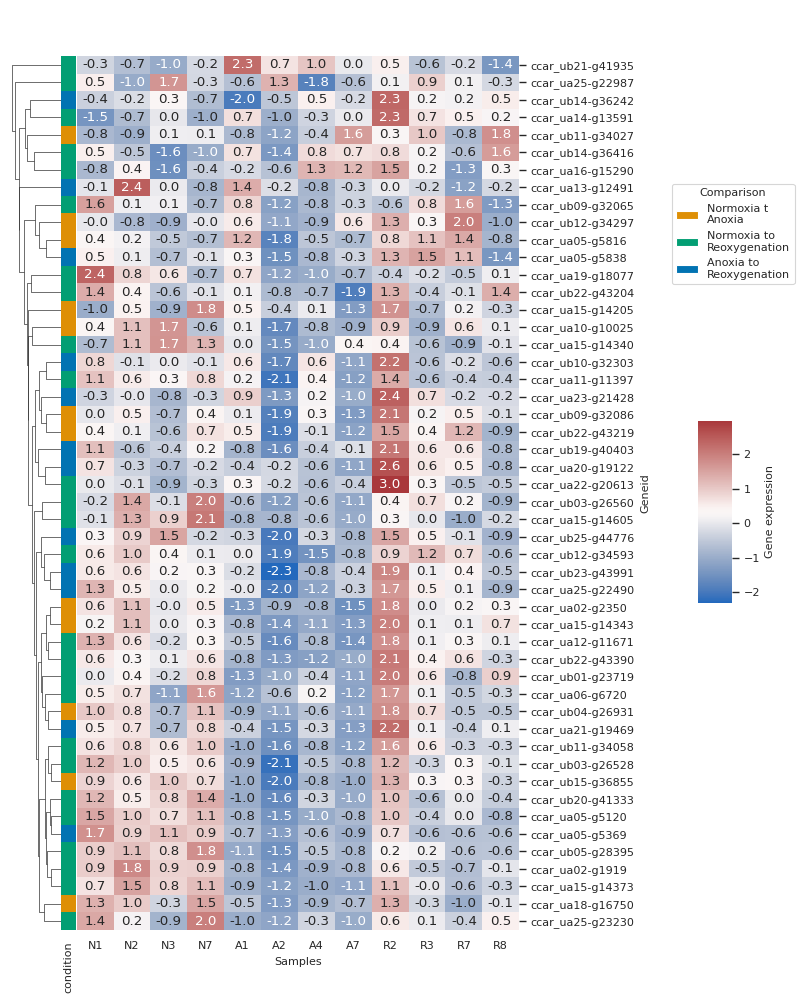

In [24]:
from matplotlib.patches import Patch

sns.set_theme(style = 'whitegrid', context='paper', rc={'axes.labelsize':8, 'xtick.labelsize':8, 'ytick.labelsize':8, 'legend.fontsize':8, 'legend.title_fontsize':8})
g = sns.clustermap(expressiondmr, 
                cmap='vlag', figsize=(17/2.54, 25.7/2.54), cbar_pos=(1.05, 0.4, 0.05, 0.18), 
                cbar_kws={'label': 'Gene expression'}, xticklabels=True, yticklabels=True, 
                annot=True, fmt=".1f", col_cluster=False, z_score=0, row_cluster=True, dendrogram_ratio=(0.1, 0.05), row_colors=colors)
#g.figure.suptitle('DMR expression')
g.ax_heatmap.set_xlabel('Samples')

legend_elements=[Patch(facecolor='#DE8F05', label='Normoxia t\nAnoxia'), 
                Patch(facecolor='#029E73', label='Normoxia to\nReoxygenation'),
                Patch(facecolor='#0173B2', label='Anoxia to\nReoxygenation')]

g.ax_cbar.legend(loc='upper left', bbox_to_anchor=(-0.8, 2.3), title='Comparison', handles=legend_elements, borderaxespad=0.)
plt.tight_layout()
# export as png 
g.savefig('8_DMR_gene_expression/dmr_expression_heatmap.svg')
